In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import scipy as sp
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
     / 129.7 MB 22.4 MB/s
ERROR: File "setup.py" not found for legacy project https://github.com/matplotlib/basemap/archive/master.zip.


In [4]:
!python -m pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 7.5 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 30.5 MB 58.0 MB/s 
     |████████████████████████████████| 6.3 MB 49.1 MB/s 


In [5]:
!pip install -q pyproj==1.9.6
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 2.8 MB 8.6 MB/s 


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df=pd.read_excel('/content/drive/MyDrive/cse /Sem 5/da/project/dataset_terror_error/modify_dataset.xlsx')

world terror attack

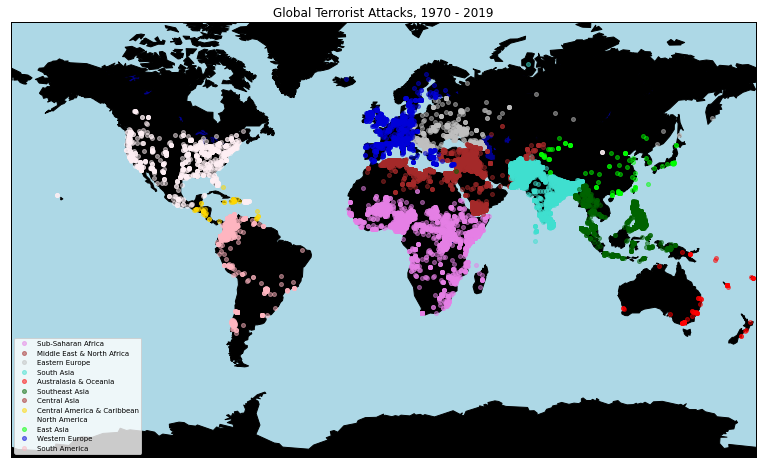

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.colors

def getRGB(col):
    rbgfinder = matplotlib.colors.ColorConverter()
    return rbgfinder.to_rgb(col)


regions = list(set(df.region_txt))

#I used the getRGB function to play with the colors and arrive at these long decimals.
colors = [(.9,.5,.9), (0.6470588235294118, 0.16470588235294117, 0.16470588235294117), (0.7529411764705882, 0.7529411764705882, 0.7529411764705882), (0.25098039215686274, 0.8784313725490196, 0.8156862745098039), (1,0,0), (0.0, 0.39215686274509803, 0.0), 'brown',(1.0, 0.8431372549019608, 0.0), (1.0, 0.9411764705882353, 0.9607843137254902), (0,1,0), (0,0,.85), (1.0, 0.7137254901960784, 0.7568627450980392)]
df1 = df
plt.figure(figsize=(15,8))

coldWorld = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
coldWorld.drawcountries()
coldWorld.drawcoastlines()
coldWorld.fillcontinents(color='black',lake_color='darkblue', zorder = 1)
coldWorld.drawmapboundary(fill_color='lightblue')

def plotAttacks(clr, rgn):
    xCoord, yCoord = coldWorld([i for i in df.longitude[df.region_txt == rgn]]
,[j for j in df.latitude[df.region_txt == rgn]]
)
    coldWorld.plot(xCoord, yCoord, "o", color = clr, label = rgn, markersize =4, alpha = .5)
 
for c, rgn in enumerate(regions):
    plotAttacks(colors[c],rgn)  
    
plt.legend(loc ='lower left', prop= {'size':7})
plt.title("Global Terrorist Attacks, 1970 - 2019")
plt.show()

#plot of locations of  theterrorist attacks based on latitude and longitude 

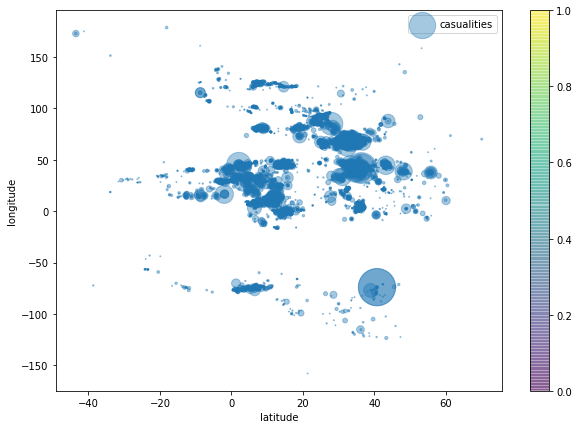

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
df.plot(kind="scatter", x="latitude", y="longitude", alpha=0.4,
    s=df['nkill'] ,label="casualities", figsize=(10,7),
    cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

#number of attacks vs years

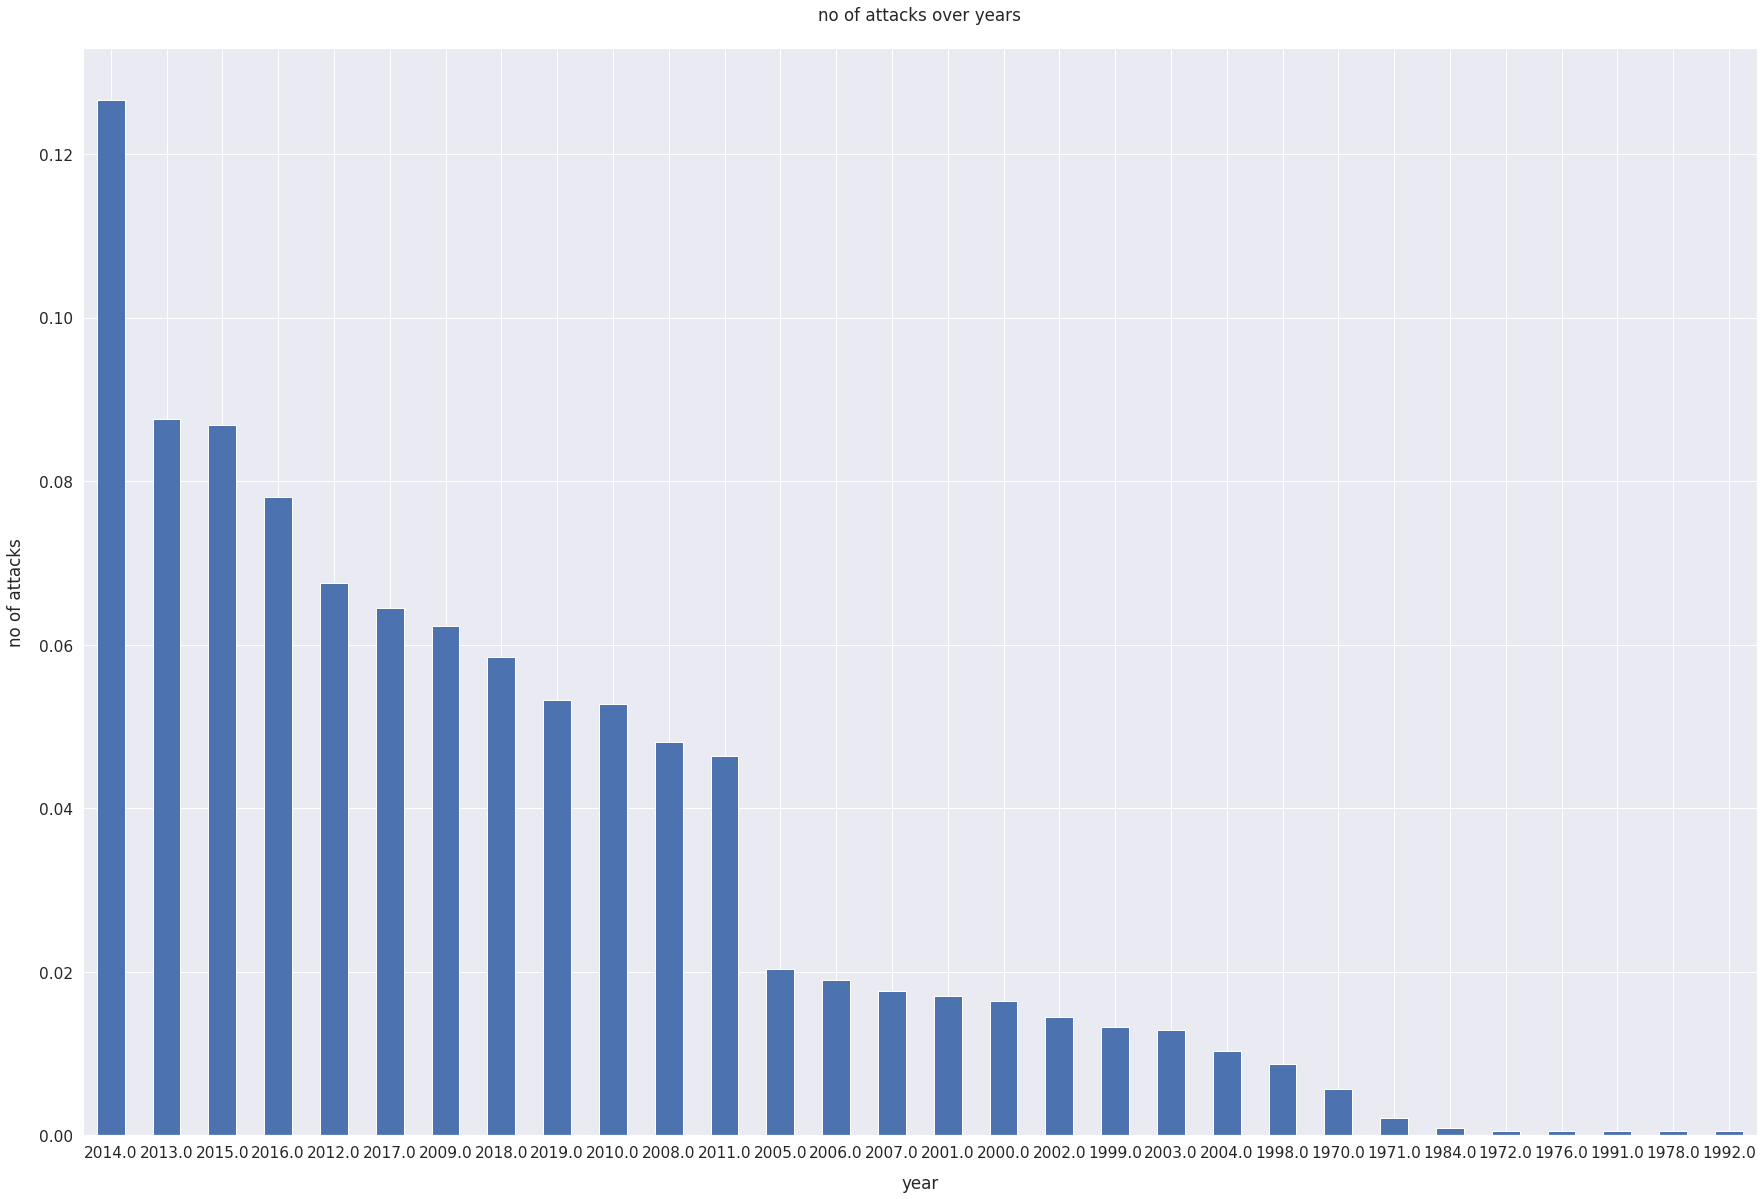

In [11]:

sns.set(font_scale=1.4)
df['iyear'].value_counts(normalize=True).head(30).plot(kind='bar', figsize=(30, 20), rot=0)
plt.xlabel("year", labelpad=14)
plt.ylabel("no of attacks", labelpad=14)
plt.title("no of attacks over years", y=1.02);

#most active terrorist groups

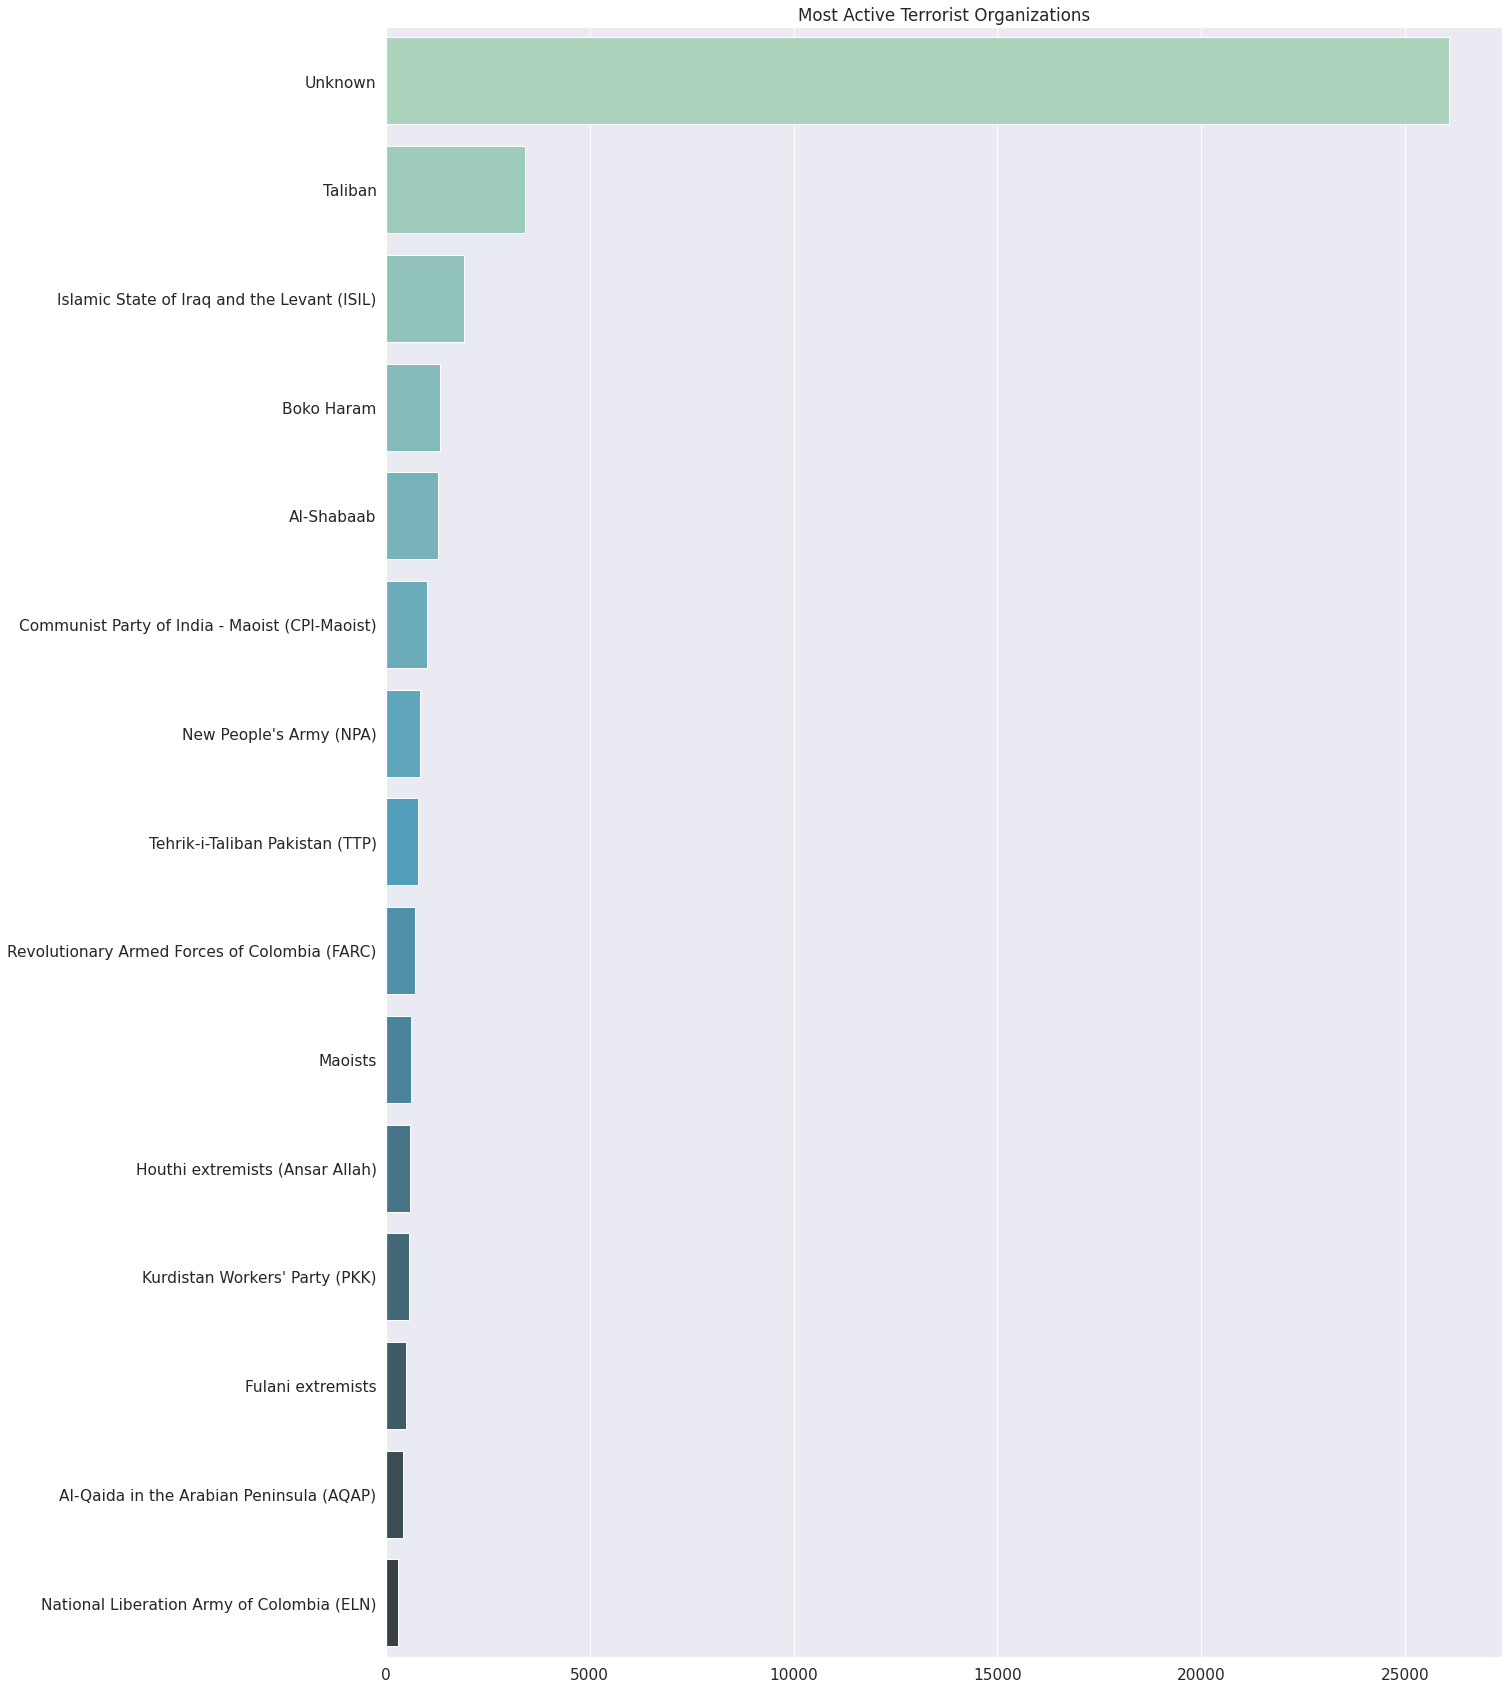

In [12]:

f, ax = plt.subplots(figsize=(20, 30)) 
sns.barplot( y = df['gname'].value_counts().head(15).index,
            x = df['gname'].value_counts().head(15).values,
                palette="GnBu_d")

ax.set_title('Most Active Terrorist Organizations' );

#attack types

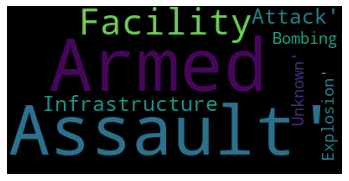

In [13]:
from wordcloud import WordCloud
text = df['attacktype1_txt'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#summary of attacks done

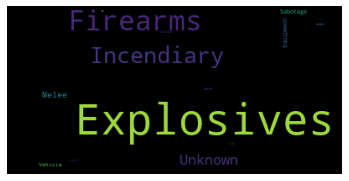

In [14]:
text2 = " ".join(title for title in df.weaptype1_txt)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'black').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2)

plt.axis("off")

plt.show()

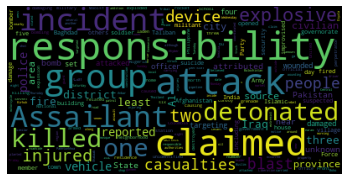

In [15]:
text2 = " ".join(title for title in df.summary)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'black').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2)

plt.axis("off")

plt.show()

Evaluation for each model

In [16]:

cv = RepeatedKFold(n_splits=15, n_repeats=4, random_state=50)
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    print(confusion_matrix(true, predicted))
    print(classification_report(true, predicted))
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

Model making
1. predicting property loss  during an attack

In [17]:
x = df[['targtype1','weaptype1','nkill','nkillter']]
y = df['property']
x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)
# RANDOMFOREST CLASSIFIER

clf =  RandomForestClassifier()
scores_prop = cross_val_score(clf, x_train, Y_train , cv = cv, scoring= 'accuracy')
clf.fit(x_train,Y_train)
y_pred_prop=clf.predict(x_test)
print_evaluate(Y_test,y_pred_prop)

[[  11    0  601]
 [   1    0   28]
 [  41    4 9846]]
              precision    recall  f1-score   support

        -9.0       0.21      0.02      0.03       612
         0.0       0.00      0.00      0.00        29
         1.0       0.94      1.00      0.97      9891

    accuracy                           0.94     10532
   macro avg       0.38      0.34      0.33     10532
weighted avg       0.89      0.94      0.91     10532

MAE: 0.6134637295860236
MSE: 6.106437523737182
RMSE: 2.471120701976571
R2 Square -0.11579024632036305
__________________________________


##2. classifcation of attack type

BUILDING KNN model for classification

In [18]:
X=pd.concat([df['latitude'],df['longitude'],df['crit1'],df['crit2'],df['crit3'],df['weaptype1'],df['nkill'],df['extended'],df['multiple'],df['success'],df['targtype1'],df['natlty1'],df['weaptype1']],axis=1)
y=df['attacktype1']


In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


1. first checking whick value of k suits are data

Text(0, 0.5, 'Mean Error')

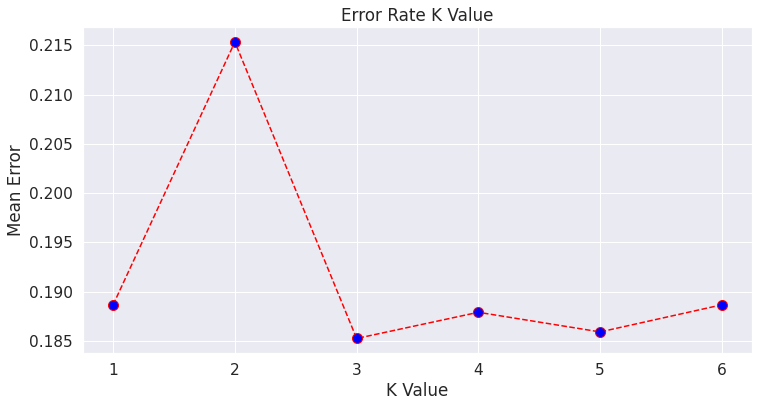

In [20]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 7):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 7), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [21]:
knn = KNeighborsClassifier(n_neighbors= 3)
scores_knn = cross_val_score(knn, X_train, y_train , cv = cv, scoring= 'accuracy')
model_knn=knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print_evaluate(y_test, y_pred_knn)

[[ 250  126  182    1    1    4    9    0    3]
 [ 143 1121  355    1    6   13  100    1    2]
 [  85  159 6014    0    8    3   58    0    0]
 [   3   12    5    8    0    3   12    0    0]
 [   2   21   20    0    8    0   15    0    0]
 [  11   98   59    4    0   48   28    0   19]
 [  20  134   79    6    4   16 1038    3   18]
 [   1    4    3    0    0    1   21   10    0]
 [   4    6    8    9    1   20   21    0   84]]
              precision    recall  f1-score   support

         1.0       0.48      0.43      0.46       576
         2.0       0.67      0.64      0.65      1742
         3.0       0.89      0.95      0.92      6327
         4.0       0.28      0.19      0.22        43
         5.0       0.29      0.12      0.17        66
         6.0       0.44      0.18      0.26       267
         7.0       0.80      0.79      0.79      1318
         8.0       0.71      0.25      0.37        40
         9.0       0.67      0.55      0.60       153

    accuracy             

BUILDING RANDOM FOREST MODEL

In [22]:
model_random=RandomForestClassifier(n_estimators=10)
model_random.fit(X_train,y_train)
y_pred_random=model_random.predict(X_test)
scores_random = cross_val_score(model_random, X_train, y_train , cv = cv, scoring= 'accuracy')
print_evaluate(y_test, y_pred_random)

[[ 356  103  101    0    0    4    5    1    6]
 [  70 1364  148    6    4   30  116    3    1]
 [  65   43 6181    1    4    4   27    1    1]
 [   3   13    0    5    0    9   10    0    3]
 [   2   24   15    1    8    2   12    1    1]
 [   7   62   20    3    2  149   18    1    5]
 [   4  117    4    4    4    9 1151    3   22]
 [   0    1    0    0    0    2   16   21    0]
 [   0    3    0    1    0   14   22    0  113]]
              precision    recall  f1-score   support

         1.0       0.70      0.62      0.66       576
         2.0       0.79      0.78      0.79      1742
         3.0       0.96      0.98      0.97      6327
         4.0       0.24      0.12      0.16        43
         5.0       0.36      0.12      0.18        66
         6.0       0.67      0.56      0.61       267
         7.0       0.84      0.87      0.85      1318
         8.0       0.68      0.53      0.59        40
         9.0       0.74      0.74      0.74       153

    accuracy             

BUILDING BAGGING MODEL

In [23]:
model_dec = DecisionTreeClassifier()
num_trees =8  
# bagging classifier
model_bagging = BaggingClassifier(base_estimator = model_dec,
                          n_estimators = num_trees,
                          random_state = 8)
  
scores_bagging = cross_val_score(model_bagging, X_train, y_train, cv = cv)
model_bagging.fit(X_train,y_train)
y_pred_bagging=model_bagging.predict(X_test)
print_evaluate(y_test, y_pred_bagging)

[[ 371   99   91    0    0    6    2    1    6]
 [  96 1328  145    7    6   39  115    6    0]
 [  67   76 6146    1    5    4   27    0    1]
 [   3   12    0   10    0    6   10    0    2]
 [   2   25   15    0    8    3   12    0    1]
 [   8   54   22    2    4  151   19    1    6]
 [   5  129    8    4    8    9 1131    3   21]
 [   0    2    0    0    0    2   14   22    0]
 [   1    1    0    2    2   10   29    0  108]]
              precision    recall  f1-score   support

         1.0       0.67      0.64      0.66       576
         2.0       0.77      0.76      0.77      1742
         3.0       0.96      0.97      0.96      6327
         4.0       0.38      0.23      0.29        43
         5.0       0.24      0.12      0.16        66
         6.0       0.66      0.57      0.61       267
         7.0       0.83      0.86      0.84      1318
         8.0       0.67      0.55      0.60        40
         9.0       0.74      0.71      0.72       153

    accuracy             

#Visualization

comparing all 3 models

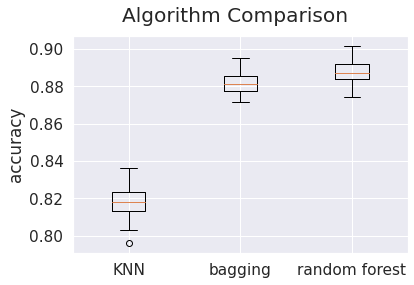

In [24]:
models = []
models.append('KNN' )
models.append('bagging' )
models.append('random forest')
results = [scores_knn,scores_bagging,scores_random]
scoring = 'accuracy'

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models)
plt.ylabel("accuracy")
plt.show()

#RANDOM FOREST: Visualizing 1 node of decision tree 

model 3:predicting the success rate of attack in countries and attack type

In [25]:
df.head()

,Unnamed: 0,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,...,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillter,nwound,nwoundus,nwoundte,property,ishostkid
0,5.0,1.970010e+11,1970.0,1.0,1.0,0.0,217.0,United States,1.0,North America,...,Firearms,5.0,Unknown Gun Type,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7.0,1.970010e+11,1970.0,1.0,2.0,0.0,217.0,United States,1.0,North America,...,Explosives,16.0,Unknown Explosive Type,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,8.0,1.970010e+11,1970.0,1.0,2.0,0.0,217.0,United States,1.0,North America,...,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9.0,1.970010e+11,1970.0,1.0,3.0,0.0,217.0,United States,1.0,North America,...,Incendiary,20.0,Gasoline or Alcohol,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,11.0,1.970011e+11,1970.0,1.0,6.0,0.0,217.0,United States,1.0,North America,...,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
df.columns

Index(['Unnamed: 0', 'eventid', 'iyear', 'imonth', 'iday', 'extended',
       'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city',
       'latitude', 'longitude', 'summary', 'crit1', 'crit2', 'crit3',
       'multiple', 'success', 'attacktype1', 'attacktype1_txt', 'targtype1',
       'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1',
       'natlty1', 'natlty1_txt', 'gname', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nkillter', 'nwound',
       'nwoundus', 'nwoundte', 'property', 'ishostkid'],
      dtype='object')

In [27]:
sub_df=df[['country','attacktype1','success']]

In [28]:
sub_df

,country,attacktype1,success
0,217.0,2.0,1.0
1,217.0,3.0,1.0
2,217.0,7.0,1.0
3,217.0,7.0,1.0
4,217.0,7.0,1.0
...,...,...,...
52655,167.0,2.0,1.0
52656,95.0,3.0,1.0
52657,195.0,9.0,1.0
52658,195.0,2.0,1.0


In [29]:
data=sub_df.astype('float32')

In [30]:
data=data.to_numpy()

In [31]:
data.shape

(52660, 3)

In [32]:
training=data[:45000]
testing=data[45000:]

In [33]:
training.shape

(45000, 3)

In [34]:
training_features=training[:,0:-1]
training_label=training[:,-1]
testing_feature=testing[:,0:-1]
testing_label=testing[:,-1]

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout

In [36]:
model = Sequential() 
model.add(Dense(12, input_dim=2, activation='relu')) 
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 
# Compile model 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
# Fit the model 
model.fit(training_features, training_label, epochs=50, batch_size=32) 


Epoch 1/50
1407/1407 [==============================] - 3s 2ms/step - loss: 1.0866 - accuracy: 0.9230
Epoch 2/50
1407/1407 [==============================] - 2s 2ms/step - loss: 0.1254 - accuracy: 0.9619
Epoch 3/50
1407/1407 [==============================] - 2s 2ms/step - loss: 0.1170 - accuracy: 0.9622
Epoch 4/50
1407/1407 [==============================] - 2s 2ms/step - loss: 0.1165 - accuracy: 0.9626
Epoch 5/50
1407/1407 [==============================] - 2s 2ms/step - loss: 0.1154 - accuracy: 0.9625
Epoch 6/50
1407/1407 [==============================] - 2s 2ms/step - loss: 0.1106 - accuracy: 0.9623
Epoch 7/50
1407/1407 [==============================] - 2s 2ms/step - loss: 0.1144 - accuracy: 0.9625
Epoch 8/50
1407/1407 [==============================] - 2s 2ms/step - loss: 0.1153 - accuracy: 0.9626
Epoch 9/50
1407/1407 [==============================] - 2s 2ms/step - loss: 0.1093 - accuracy: 0.9626
Epoch 10/50
1407/1407 [==============================] - 3s 2ms/step - loss: 0.109

In [37]:
# evaluate the model 
scores = model.evaluate(testing_feature, testing_label) 
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

240/240 [==============================] - 1s 2ms/step - loss: 0.1025 - accuracy: 0.9463

accuracy: 94.63%


happiness +gtd

In [38]:
full_df=pd.read_excel("/content/drive/MyDrive/cse /Sem 5/da/project/dataset_terror_error/globalterrorismdb_0522dist.xlsx")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-38-2799c3003bfa>", line 1, in <module>
    full_df=pd.read_excel("/content/drive/MyDrive/cse /Sem 5/da/project/dataset_terror_error/globalterrorismdb_0522dist.xlsx")
  File "/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/excel/_base.py", line 395, in read_excel
    mangle_dupe_cols=mangle_dupe_cols,
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/excel/_base.py", line 1292, in parse
    **kwds,
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/excel/_base.py", line 539, in parse
    data = self.get_sheet_data(sheet, convert_float)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/excel/_openpyxl.py", line 572, in get_she

KeyboardInterrupt: ignored

In [ ]:
full_df

In [ ]:
filtered_df = full_df.loc[(full_df['iyear'] >= 2015)]    
# Display
filtered_df

In [ ]:
happiness_dataset_2015=pd.read_csv("/content/drive/MyDrive/cse /Sem 5/da/project/dataset_terror_error/happiness/2015.csv")

In [ ]:
happiness_dataset_2015['iyear']=2015

In [ ]:
happiness_dataset_2015

In [ ]:
happiness_dataset_2016=pd.read_csv('/content/drive/MyDrive/cse /Sem 5/da/project/dataset_terror_error/happiness/2016.csv')
happiness_dataset_2016['iyear']=2016

In [ ]:
happiness_dataset_2017=pd.read_csv('/content/drive/MyDrive/cse /Sem 5/da/project/dataset_terror_error/happiness/2017.csv')
happiness_dataset_2017['iyear']=2017

In [ ]:
happiness_dataset_2018=pd.read_csv('/content/drive/MyDrive/cse /Sem 5/da/project/dataset_terror_error/happiness/2018.csv')
happiness_dataset_2018['iyear']=2018

In [ ]:
happiness_dataset_2019=pd.read_csv('/content/drive/MyDrive/cse /Sem 5/da/project/dataset_terror_error/happiness/2019.csv')
happiness_dataset_2019['iyear']=2019

In [ ]:
happiness_dataset_2020=pd.read_csv('/content/drive/MyDrive/cse /Sem 5/da/project/dataset_terror_error/happiness/2020.csv')
happiness_dataset_2020['iyear']=2020

In [ ]:
df_hap= pd.concat([happiness_dataset_2015,happiness_dataset_2016,happiness_dataset_2017,happiness_dataset_2018,happiness_dataset_2019,happiness_dataset_2020])
print(df_hap)

In [ ]:
df_hap.describe()

In [ ]:
df_hap['iyear'].unique()

In [ ]:
filtered_df.columns

In [ ]:
sub=filtered_df[['iyear','country_txt','gname','nkill']]

In [ ]:
sub_hap=df_hap[['iyear','Country','Happiness Score']]

In [ ]:
sub_hap.columns = ['iyear', 'country_txt', 'Happiness Score']

In [ ]:
merged_Frame = pd.merge(sub, sub_hap, on = ['iyear','country_txt'],how='left')

In [ ]:
merged_Frame

In [ ]:
d=merged_Frame[(merged_Frame['country_txt'] =='Iraq')]

In [ ]:
merged_Frame.to_csv('gtd_hap.csv')

In [ ]:
country_list=merged_Frame['country_txt'].unique()

In [ ]:
iyear=[2015,2016,2017,2018,2019,2020]


In [ ]:

dfw=merged_Frame.groupby(['country_txt','iyear','Happiness Score']).count()


In [ ]:
dfq=merged_Frame[['country_txt','iyear','Happiness Score']]

In [ ]:
dfq.to_csv('dfq.csv')

In [ ]:
dfw.to_csv('dfw.csv')

In [39]:
sub_df=df[['country_txt','nkill']]

In [50]:
#Import libraries
from matplotlib import pyplot as plt
import numpy as np
sq=df.groupby(['country_txt'])['nkill'].sum()
sq=sq.sort_values(by=['nkill'])
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(sq)
 
# show plot
plt.show()

sq.to_csv('sq.csv')

TypeError: ignored

In [51]:
sq=pd.read_csv('sq.csv')

In [52]:
sq.head()

,country_txt,nkill
0,Afghanistan,20930.0
1,Albania,3.0
2,Algeria,2221.0
3,Angola,791.0
4,Argentina,0.0


In [57]:
sq=sq.sort_values(by=['nkill'],ascending=False)

In [58]:
sq

,country_txt,nkill
68,Iraq,31742.0
0,Afghanistan,20930.0
110,Nigeria,16144.0
112,Pakistan,12548.0
143,Syria,7705.0
...,...,...
142,Switzerland,0.0
4,Argentina,0.0
134,South Korea,0.0
149,Trinidad and Tobago,0.0


In [61]:
sq.to_csv('sq.csv')

ValueError: ignored

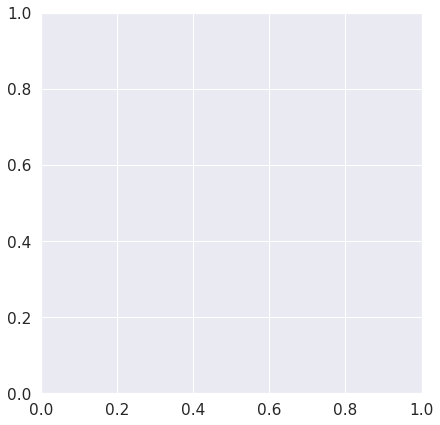

In [60]:
fig = plt.figure(figsize =(10, 7))
plt.pie(sq)
 
# show plot
plt.show()